In [268]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
data = pd.read_excel('train_data.xlsx')
data.head()

,کی گفته مرد گریه نمیکنه!؟!؟ سیلم امشب سیل #اصفهان,SAD
0,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...,OTHER
1,تنهاییم شبیه تنهاییه ظهرای بچگیم شده وقتی که ه...,SAD
2,خوبه تمام قسمت‌های گوشی رو محافظت می‌کنه,HAPPY
3,این خاک مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
4,اگه تو بغلت بودم حالم خیلی بهتر میشد,SAD


In [270]:
def column_name_set(data):
    data.columns = ['Sentence', 'Emotion']
    return data

data = column_name_set(data)
data.head()

,Sentence,Emotion
0,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...,OTHER
1,تنهاییم شبیه تنهاییه ظهرای بچگیم شده وقتی که ه...,SAD
2,خوبه تمام قسمت‌های گوشی رو محافظت می‌کنه,HAPPY
3,این خاک مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
4,اگه تو بغلت بودم حالم خیلی بهتر میشد,SAD


In [271]:
data.describe()

,Sentence,Emotion
count,4923,4923
unique,4923,5
top,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...,HAPPY
freq,1,1462


In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  4923 non-null   object
 1   Emotion   4923 non-null   object
dtypes: object(2)
memory usage: 77.0+ KB


In [273]:
data.isnull().sum()

Sentence    0
Emotion     0
dtype: int64

C:\Users\hi\AppData\Local\Temp\ipykernel_20468\1880826210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Emotion', palette='plasma')


<Axes: xlabel='Emotion', ylabel='count'>

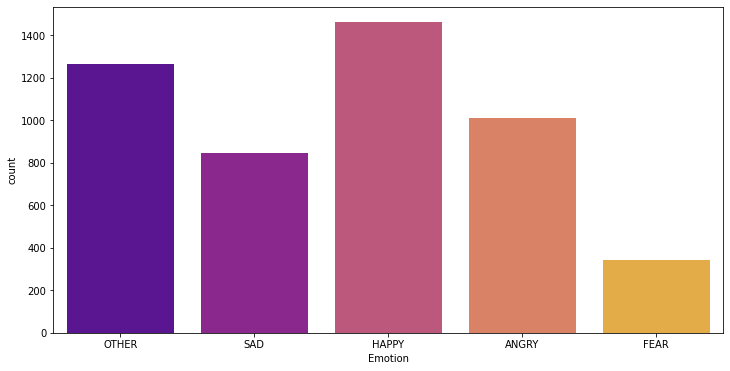

In [274]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Emotion', palette='plasma')

In [275]:
data.duplicated().sum()

0

#### The provided data set contains a collection of Persian sentences and the corresponding emotions associated with each sentence. The dataset has two columns: one for the sentence and the other for the emotion of that sentence. Initially, the column names were not provided, so the first step was to set appropriate names for the columns. This was done to ensure clarity and ease of reference when working with the data. After setting the column names, the next step was to check the data for any null values or duplicate rows. Fortunately, the analysis revealed that there were no null values or duplicate rows in the dataset. Finally, to gain a better understanding of the data, a count plot of the target values (emotions) was generated. The result of this analysis showed that the majority of the sentences in the dataset evoke a sense of happiness, while the sentences conveying a sense of fear are the least common.

# Preproccessing

In [276]:
import hazm 
import nltk

In [277]:
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

210
{'n', '۷', 'س', '0', 't', 'g', 'K', '⃟', 'ض', 'ة', '☠', 'ا', 'ہ', 'ے', 'ۀ', '‐', '⛓', 'f', 'ی', '#', '[', '۵', '؟', 'y', '”', 'p', 'ق', 'ئ', '،', '3', 'ى', '۹', 'S', 'أ', '+', 'ن', 'ذ', 'ُ', 'k', 'H', 'ظ', 'j', '٦', '‘', 'ه', '}', 'ط', 'م', '♂', 'ص', 'ᴇ', '٪', 'V', '⁉', '❤', 'N', 'e', 'P', 'ک', 'h', 'Z', '۳', ' ', 'آ', '\n', 's', '5', 'l', '٫', '6', 'ً', 'ْ', 'ە', 'M', 'ع', 'و', 'ّ', 'ت', '«', '٠', '\u2067', '\u2066', 'W', '8', '⚽', '۱', '؛', '❄', 'T', '4', 'R', 'ؤ', '7', '☝', '۰', '%', '_', '^', '۶', 'ي', '/', 'a', 'ٔ', '۲', 'ᴏ', '️', '»', '?', 'A', 'b', '9', '⭕', 'ɴ', 'B', 'm', '♀', 'ث', '⊰', 'خ', '.', '|', 'Q', '-', '“', 'َ', 'd', 'ھ', 'پ', '\u2069', 'U', '¹', '⚘', '’', '۸', 'D', 'i', '\u200d', '☺', '²', 'چ', '۴', '•', ':', 'J', '&', 'ح', '♥', ')', '1', 'ـ', 'ټ', '٣', '٢', '✅', '۔', ']', 'ژ', 'r', 'ك', '*', 'w', '…', '2', 'ج', 'ء', 'ز', '✨', 'L', 'z', 'c', 'C', '١', 'ᴛ', 'ʏ', '!', 'ف', '☄', 'ِ', 'o', '✍', 'ر', '✋', 'گ', 'E', 'ب', 'u', 'Y', '☹', ',', 'q', 'غ', '☘', ';', 'I', '✌',

In [278]:
def normalize_yeh(text):
    yeh_characters = ['ی', 'ي', 'ے', 'ئ', 'ى']
    for char in yeh_characters:
        text = text.replace(char, 'ی')
    return text

def number_convertor(text):
    persian_digits = '۰۱۲۳۴۵۶۷۸۹٦'
    english_digits = '01234567896'
    translation_table = str.maketrans(persian_digits, english_digits)
    return text.translate(translation_table)

In [279]:
data['Sentence'] = data['Sentence'].apply(number_convertor)
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

data['Sentence'] = data['Sentence'].apply(normalize_yeh)
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

199
{'n', '⃟', 'س', '0', 't', 'g', 'K', 'ۀ', 'ض', 'ة', '☠', 'ا', 'ہ', 'ے', '‐', '⛓', 'f', 'ی', '#', '[', '؟', 'y', '”', 'p', 'ق', 'ئ', '،', '3', 'ى', 'S', 'أ', '+', 'ن', 'ذ', 'ُ', 'k', 'H', 'ظ', 'j', '‘', 'ه', '}', 'ط', 'م', '♂', 'ص', 'ᴇ', '٪', 'V', '⁉', '❤', 'N', 'e', 'P', 'h', 'ک', 'Z', ' ', 'آ', '\n', 's', '5', 'l', '٫', '6', 'ً', 'ْ', 'ە', 'M', 'ع', 'و', 'ّ', 'ت', '«', '٠', '\u2067', '\u2066', 'W', '8', '⚽', '؛', '❄', 'T', '4', 'R', 'ؤ', '7', '☝', '%', '_', '^', 'ٔ', 'ي', '/', 'a', 'ᴏ', '️', '»', '?', 'A', 'b', '9', '⭕', 'ɴ', 'B', 'm', '♀', 'ث', '⊰', 'خ', '.', '|', 'Q', '-', '“', 'َ', 'd', 'ھ', 'پ', '\u2069', 'U', '¹', '⚘', '’', 'D', 'i', '\u200d', '☺', '²', 'چ', '•', ':', 'J', '&', 'ح', '♥', ')', '1', 'ـ', 'ټ', '٣', '٢', '✅', '۔', ']', 'ژ', 'r', 'ك', '*', 'w', '…', '2', 'ج', 'ء', 'ز', '✨', 'L', 'z', 'c', 'C', '١', 'ᴛ', 'ʏ', '!', 'ف', '☄', 'ِ', 'o', '✍', 'ر', '✋', 'گ', 'E', 'ب', 'u', 'Y', '☹', ',', 'q', 'غ', '☘', ';', 'I', '✌', 'G', 'ش', 'x', 'v', '~', '\u200c', '(', 'د', '⭐', 'ل',

In [280]:
def text_normalizer(data):
    normalizer = hazm.Normalizer()
    data['Sentence'] = data['Sentence'].apply(normalizer.normalize)
    return data

data = text_normalizer(data)
data.head()

,Sentence,Emotion
0,عکسی که چند روز پیش گذاشته بودم این فیلم الانش...,OTHER
1,تنهاییم شبیه تنهاییه ظهرای بچگیم شده وقتی‌که ه...,SAD
2,خوبه تمام قسمت‌های گوشی رو محافظت می‌کنه,HAPPY
3,این خاک‌مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
4,اگه تو بغلت بودم حالم خیلی بهتر می‌شد,SAD


In [281]:
def word_tokenizer(data):
    data['Sentence'] = data['Sentence'].apply(hazm.word_tokenize)
    return data

data = word_tokenizer(data)
data.head()

,Sentence,Emotion
0,"[عکسی, که, چند, روز, پیش, گذاشته_بودم, این, فی...",OTHER
1,"[تنهاییم, شبیه, تنهاییه, ظهرای, بچگیم, شده, وق...",SAD
2,"[خوبه, تمام, قسمت‌های, گوشی, رو, محافظت, می‌کنه]",HAPPY
3,"[این, خاک‌مال, مردمان, است, نه, حاکمان, #ایران...",ANGRY
4,"[اگه, تو, بغلت, بودم, حالم, خیلی, بهتر, می‌شد]",SAD


In [282]:
def text_lemmatizer(data):
    lemmatizer = hazm.Lemmatizer()
    data['Sentence'] = data['Sentence'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))
    return data

data = text_lemmatizer(data)
data.head()

,Sentence,Emotion
0,عکس که چند روز پیش گذاشت#گذار این فیلم الانشه ...,OTHER
1,تن شبیه تنهاییه ظهرای بچگیم شده وقتی‌که همه می...,SAD
2,خوبه تمام قسمت گوشید#گوش رو محافظت می‌کنه,HAPPY
3,این خاک‌مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
4,اگه تو بغل بود#است حالم خیلی بهتر شد#شو,SAD


In [283]:
import re

def num_omitter(data):
    data['Sentence'] = data['Sentence'].apply(lambda x: re.sub(r'\d+', '', x))
    return data

data = num_omitter(data)
data.head()

,Sentence,Emotion
0,عکس که چند روز پیش گذاشت#گذار این فیلم الانشه ...,OTHER
1,تن شبیه تنهاییه ظهرای بچگیم شده وقتی‌که همه می...,SAD
2,خوبه تمام قسمت گوشید#گوش رو محافظت می‌کنه,HAPPY
3,این خاک‌مال مردمان است نه حاکمان #ایران #مهسا_...,ANGRY
4,اگه تو بغل بود#است حالم خیلی بهتر شد#شو,SAD


In [284]:
uniqueChars = set(''.join(data['Sentence']))
print(len(uniqueChars))
print(uniqueChars)

163
{'n', '⃟', 'س', 't', 'g', 'K', 'ض', 'ة', '☠', 'ا', '‐', '⛓', 'f', 'ی', '#', '[', '؟', 'y', 'p', 'ق', '،', 'S', 'أ', '+', 'ن', 'ذ', 'k', 'j', 'H', 'ظ', '‘', 'ه', '}', 'ط', 'م', '♂', 'ص', 'ᴇ', '٪', 'V', '⁉', '❤', 'N', 'e', 'P', 'h', 'ک', 'Z', ' ', 'آ', 's', 'l', '٫', 'M', 'ع', 'و', 'ت', '«', '\u2067', '\u2066', 'W', '⚽', '؛', '❄', 'T', 'R', 'ؤ', '☝', '_', '^', '/', 'a', 'ᴏ', '️', '»', '?', 'A', 'b', '⭕', 'ɴ', 'B', 'm', '♀', 'ث', '⊰', 'خ', '.', '|', 'Q', '-', 'd', '\u2069', 'پ', 'U', '¹', '⚘', '’', 'D', 'i', '\u200d', '☺', '²', 'چ', '•', ':', 'J', '&', 'ح', '♥', ')', '✅', ']', 'ژ', 'r', '*', 'w', '…', 'ء', 'ج', '"', 'ز', '✨', 'L', 'z', 'c', 'C', 'ᴛ', 'ʏ', '!', 'ف', '☄', 'o', '✍', 'ر', '✋', 'گ', 'E', 'ب', 'u', 'Y', '☹', ',', 'q', 'غ', '☘', ';', 'I', '✌', 'G', 'ش', 'x', 'v', '~', '\u200c', '(', 'د', '⭐', 'ل', '٬', 'F', 'O', '=', '°'}


# Data Splitting

In [285]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, random_state=42, test_size=0.2)

C:\Users\hi\AppData\Local\Temp\ipykernel_20468\1392288644.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Emotion', palette='plasma')


<Axes: xlabel='Emotion', ylabel='count'>

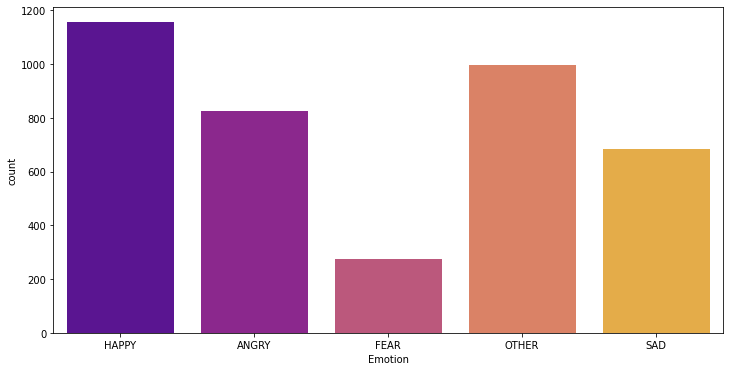

In [286]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_data, x='Emotion', palette='plasma')

In [287]:
print(train_data.shape)
print(test_data.shape)

(3938, 2)
(985, 2)


In [288]:
train_x = pd.DataFrame(train_data['Sentence'], columns=['Sentence'], index=train_data.index)
train_y = train_data['Emotion']

test_x = pd.DataFrame(test_data['Sentence'], columns=['Sentence'], index=test_data.index)
test_y = test_data['Emotion']

In [289]:
from sklearn.model_selection import train_test_split

def splitter(data):
    train_data, test_data = train_test_split(data, random_state=42, test_size=0.2)

    return train_data, test_data

In [290]:
def target_split(train_data, test_data):
    train_x = pd.DataFrame(train_data['Sentence'], columns=['Sentence'], index=train_data.index)
    train_y = train_data['Emotion']

    test_x = pd.DataFrame(test_data['Sentence'], columns=['Sentence'], index=test_data.index)
    test_y = test_data['Emotion']

    return train_x, train_y, test_x, test_y

# Feature engineering

In [291]:
from sklearn.feature_extraction.text import TfidfVectorizer

def text_vectorizer(train_x, test_x):

    vectorizer = TfidfVectorizer()
    vector = vectorizer.fit_transform(train_x['Sentence'])
    vectorized_x_train = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out(), index=train_data.index)

    vector2 = vectorizer.transform(test_x['Sentence'])
    vectorized_x_test = pd.DataFrame(vector2.toarray(), columns=vectorizer.get_feature_names_out(), index=test_data.index)

    return vectorized_x_train, vectorized_x_test

vectorized_x_train, vectorized_x_test = text_vectorizer(train_x, test_x)

In [292]:
vectorized_x_train.head()

,__,_اسنپ,_امینی,_ای,_جام,_دی,_زلزله,_و_,_پول,_ژانویه,...,یکمی,یکپارچگی,یکپارچگیه,یکی,یکیشون,یگانه,یی,ییره,ییشینگی,ییمیز
184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [293]:
vectorized_x_train.shape

(3938, 7592)

In [294]:
vectorized_x_test.shape

(985, 7592)

# Model Training

In [295]:
from sklearn.metrics import f1_score, precision_score, accuracy_score, roc_curve, recall_score, ConfusionMatrixDisplay, confusion_matrix 
from sklearn.model_selection import GridSearchCV, StratifiedKFold

def model_train_test_evaluating(x_train, y_train, x_test, y_test, model, param_grid):
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(x_train, y_train)
    classifier = grid_search.best_estimator_

    y_train_pred = classifier.predict(x_train)
    y_test_pred = classifier.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1_train = f1_score(y_train, y_train_pred, average='macro')
    f1_test = f1_score(y_test, y_test_pred, average='macro') 

    print('Cross validation scores:')
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_:.4f}")
    
    print('train_data report:')
    print('Acuuracy: ', end='')
    print(train_accuracy)
    print('F1_score: ', end='')
    print(f1_train)

    cm = confusion_matrix(y_train, y_train_pred)
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    print('test_data report:')
    print('Acuuracy: ', end='')
    print(test_accuracy)
    print('F1_score: ', end='')
    print(f1_test)

    cm = confusion_matrix(y_test, y_test_pred)
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [296]:
from sklearn.preprocessing import LabelEncoder

def pipline(train, test, model, param_grid):
    # Preproccessing

    # column name setting 
    train = column_name_set(train)
    test = column_name_set(test)

    # changing ی in the text
    train['Sentence'] = train['Sentence'].apply(normalize_yeh)
    test['Sentence'] = test['Sentence'].apply(normalize_yeh)
    # convert number to English
    train['Sentence'] = train['Sentence'].apply(number_convertor)
    test['Sentence'] = test['Sentence'].apply(number_convertor)

    # normalize and tokenize the text
    train = text_normalizer(train)
    train = word_tokenizer(train)
    test = text_normalizer(test)
    test = word_tokenizer(test)

    # lemmatizing the text
    train = text_lemmatizer(train)
    test = text_lemmatizer(test)

    # omitting digits
    test = num_omitter(test)
    test = num_omitter(test)

    # target splitting
    train_x, train_y, test_x, test_y = target_split(train, test)

    # text vectorizing 
    vectorized_x_train, vectorized_x_test = text_vectorizer(train, test)

    #encoding target
    label_encoder = LabelEncoder()
    train_y_encoded = label_encoder.fit_transform(train_y)
    test_y_encoded = label_encoder.transform(test_y)

    # Model training
    model_train_test_evaluating(vectorized_x_train, train_y_encoded, vectorized_x_test, test_y_encoded, model, param_grid)

In [297]:
data = pd.read_excel('train_data.xlsx')

Cross validation scores:
Best parameters: {'max_depth': 30, 'min_samples_leaf': 10}
Best score: 0.4911
train_data report:
Acuuracy: 0.5700863382427628
F1_score: 0.5426938227898179


<Figure size 576x432 with 0 Axes>

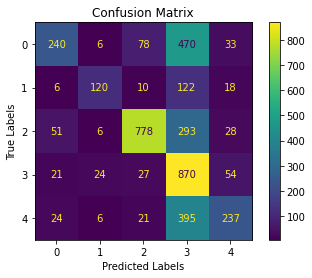

test_data report:
Acuuracy: 0.5147208121827411
F1_score: 0.463544538169345


<Figure size 576x432 with 0 Axes>

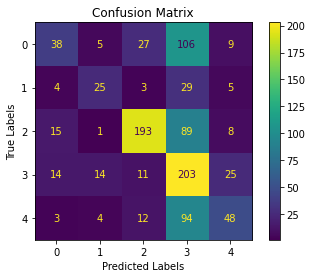

In [298]:
from sklearn import tree

# Data splitting
data1 = data.copy()
train_data, test_data = splitter(data1)

param_grid=[
    {'max_depth': [10, 20, 30], 'min_samples_leaf': [10, 20, 30]}
]

dt_classifier = tree.DecisionTreeClassifier(random_state=42, criterion='gini')
pipline(train_data, test_data, dt_classifier, param_grid)

Cross validation scores:
Best parameters: {'max_depth': 30, 'n_estimators': 50}
Best score: 0.5442
train_data report:
Acuuracy: 0.7559674961909599
F1_score: 0.7325360787032803


<Figure size 576x432 with 0 Axes>

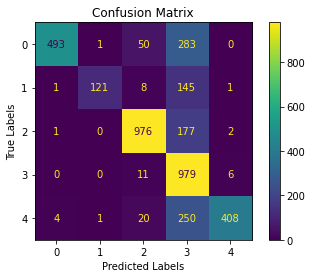

test_data report:
Acuuracy: 0.5604060913705584
F1_score: 0.46213619136039047


<Figure size 576x432 with 0 Axes>

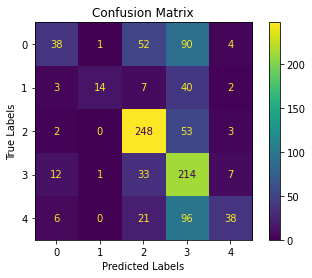

In [299]:
from sklearn.ensemble import RandomForestClassifier

# Data splitting
data2 = data.copy()
train_data, test_data = splitter(data2)

param_grid=[
    {'max_depth': [10, 20, 30], 'n_estimators': [30, 40, 50]}
]

rf_classifier = RandomForestClassifier(random_state=42, criterion='gini')
pipline(train_data, test_data, rf_classifier, param_grid)

Cross validation scores:
Best parameters: {'learning_rate': 0.3, 'max_depth': 5}
Best score: 0.5843
train_data report:
Acuuracy: 0.8557643473844592
F1_score: 0.859572723613866


<Figure size 576x432 with 0 Axes>

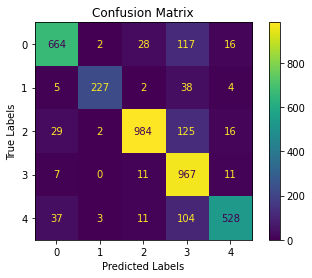

test_data report:
Acuuracy: 0.6030456852791878
F1_score: 0.5700030787247256


<Figure size 576x432 with 0 Axes>

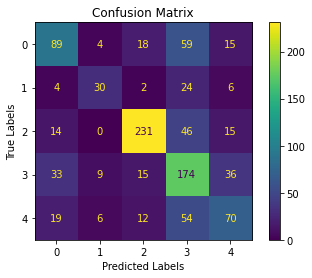

In [300]:
from xgboost import XGBClassifier

# Data splitting
data3 = data.copy()
train_data, test_data = splitter(data3)

param_grid=[
    {'max_depth': [5, 10, 15], 'learning_rate': [0.1, 0.2, 0.3]}
]

xgboost = XGBClassifier(random_state=42)
pipline(train_data, test_data, xgboost, param_grid)

c:\Users\hi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\hi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\line

Cross validation scores:
Best parameters: {'penalty': 'l2'}
Best score: 0.6051
train_data report:
Acuuracy: 0.8603351955307262
F1_score: 0.8295123294600708


<Figure size 576x432 with 0 Axes>

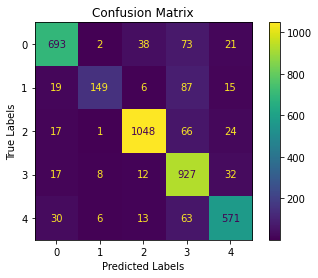

test_data report:
Acuuracy: 0.617258883248731
F1_score: 0.5766789319725942


<Figure size 576x432 with 0 Axes>

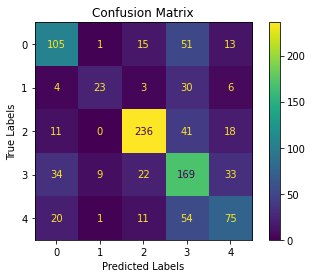

In [301]:
from sklearn.linear_model import LogisticRegression

# Data splitting
data4 = data.copy()
train_data, test_data = splitter(data4)

param_grid=[
    {'penalty': ['l1', 'l2']}
]

logistic_regression = LogisticRegression(random_state=42, solver='sag')
pipline(train_data, test_data, logistic_regression, param_grid)